<a href="https://colab.research.google.com/github/AhanR/NeuraHacks-forestFire/blob/main/forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting the area of the forest fire based on FWI system indices**


In [31]:
import pandas as pd
forestFireData = pd.read_csv("forestfires.csv")

Create a new dataframe without any extra data such as X,Y coords, date, temperature and rain levels(in this col the data was insufficient so we dropped it)

In [32]:
fireAreaData = forestFireData
fireAreaData = fireAreaData.drop(fireAreaData.index[fireAreaData["area"] == 0])
del fireAreaData["X"], fireAreaData["Y"], fireAreaData["month"], fireAreaData["temp"], fireAreaData["rain"], fireAreaData["day"]

In [33]:
display(fireAreaData)

,FFMC,DMC,DC,ISI,RH,wind,area
138,85.8,48.3,313.4,3.9,42,2.7,0.36
139,91.0,129.5,692.6,7.0,38,2.2,0.43
140,90.9,126.5,686.5,7.0,39,1.8,0.47
141,95.5,99.9,513.3,13.2,31,4.5,0.55
142,90.1,108.0,529.8,12.5,51,8.9,0.61
...,...,...,...,...,...,...,...
509,91.0,166.9,752.6,7.1,71,7.6,2.17
510,91.0,166.9,752.6,7.1,62,5.4,0.43
512,81.6,56.7,665.6,1.9,32,2.7,6.44
513,81.6,56.7,665.6,1.9,71,5.8,54.29


Normalising the input and output values for better training results

In [34]:
high = fireAreaData.max(axis = 0)
low = fireAreaData.min(axis = 0)
fireAreaData["area"] = ((fireAreaData["area"]) - low["area"])/high["area"]
fireAreaData["FFMC"] = ((fireAreaData["FFMC"]) - 18.70)/77.5
fireAreaData["wind"] = ((fireAreaData["wind"]) - 0.40)/9
fireAreaData["RH"] = ((fireAreaData["RH"]) - 15)/85
fireAreaData["DMC"] = ((fireAreaData["DMC"]) - 1.1)/290.2
fireAreaData["DC"] = ((fireAreaData["DC"]) - 7.9)/852.7
fireAreaData["ISI"] = (fireAreaData["ISI"])/56.1

In [35]:
x = fireAreaData.drop('area', axis = 1)
y = fireAreaData["area"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.15,random_state = 24, shuffle = True)
display(x_train, y_train)

,FFMC,DMC,DC,ISI,RH,wind
199,0.578065,0.240179,0.770963,0.014260,0.270588,0.355556
189,0.929032,0.147829,0.099097,0.098039,0.529412,0.400000
484,0.983226,0.445210,0.679254,0.251337,0.117647,0.400000
178,0.921290,0.281875,0.853524,0.110517,0.352941,0.200000
284,0.858065,0.013094,0.009265,0.112299,0.364706,0.844444
...,...,...,...,...,...,...
411,0.850323,0.007236,0.041867,0.058824,0.447059,1.000000
270,0.947097,0.522054,0.762636,0.254902,0.482353,0.300000
276,0.860645,0.083735,0.400844,0.046346,0.070588,0.900000
311,0.950968,0.360786,0.879794,0.176471,0.152941,0.155556


199    0.010295
189    0.007471
484    0.024147
178    0.004391
284    0.022139
         ...   
411    0.004153
270    0.000394
276    0.016281
311    0.013017
384    0.011083
Name: area, Length: 229, dtype: float64

Compiling the model and testing it for accuracy

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = [x_train.shape[1]]

model =  keras.Sequential([
    layers.Dense(32, activation = 'relu', input_shape=input_shape),
    layers.Dense(16, activation = 'relu', name="layer_2"),
    layers.Dense(1, activation = 'relu', name="layer_out")
])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 layer_out (Dense)           (None, 1)                 17        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer="adam", loss="mae")

In [42]:
losses = model.fit(x_train, y_train,
                   validation_data=(x_test, y_test),
                   batch_size=16,
                   epochs=8)

Epoch 1/8
15/15 [==============================] - 0s 7ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 2/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 3/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 4/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 5/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 6/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 7/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152
Epoch 8/8
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - val_loss: 0.0152


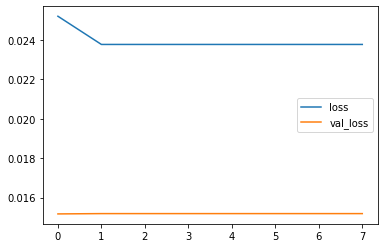

In [40]:
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

In [44]:
score = model.evaluate(x_test, y_test, verbose = 0)
print("testing accuracy has reached : " , score)

testing accuracy has reached :  0.015188341028988361
